In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import StandardScaler, normalize, OrdinalEncoder, LabelEncoder
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings 

warnings.filterwarnings("ignore")


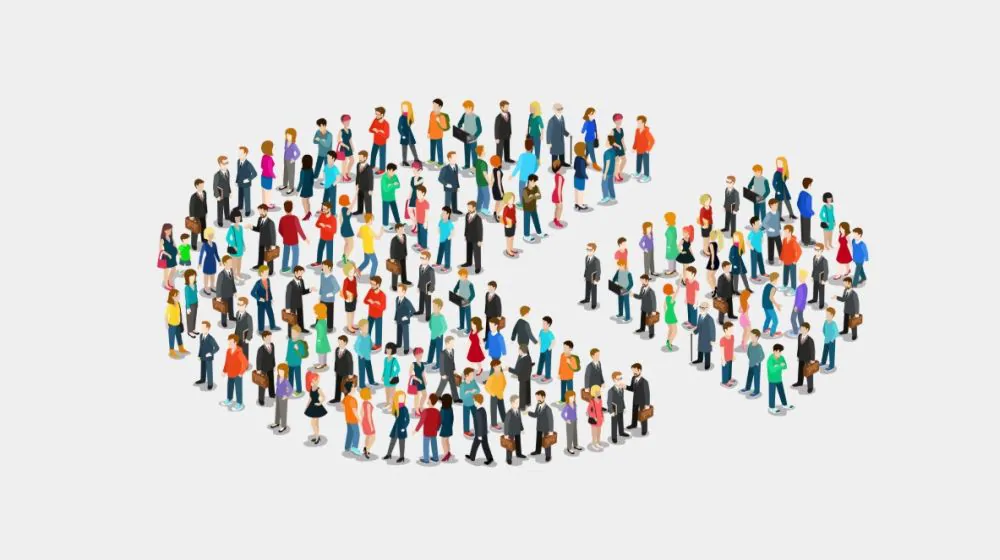

<div style="background-color: LightBlue; border-radius: 10px; padding: 10px;">
    <h2 style="color: Black; margin: 0;"><center>Customer Segmentation</center></h2>
</div>



In this project, I will perform unsupervised clustering on customer data. By segmenting customers into groups based on their similarities, we can better understand and act to their distinct needs and behaviors. This approach allows us to optimize the significance of each customer to the business, modify marketing strategy, and address the concerns of different customer types more effectively.

In [84]:
url = 'marketing_campaign.csv'
delimiter = "\t" 
df = pd.read_csv(url, delimiter=delimiter)

In [85]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

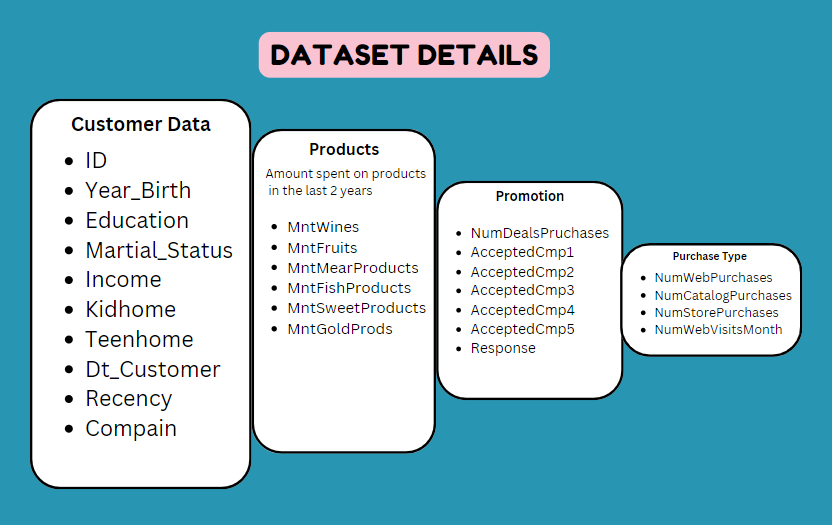

### Info Breakdown

#### Issues with data:


- Missing values in Income column
- Dt_Costumer is not set a date format 
- Education & Martial_Status needs to be converted to numerical values

### Missing Income 

Although it is only 24 values missing in a dataset of 2240 rows, I decided to impute the missing values using lightGBM. The full process can be found in the file bellow 

The imputed dataframe is used from here on

In [88]:
## Performed imputing to missing Income data using lightgbm 
imputed_df = pd.read_csv('fixed_df_with_income.csv')

<div style="background-color: LightBlue; border-radius: 10px; padding: 10px;">
    <h2 style="color: Black; margin: 0;"><center>Data Cleaning & Wrangling</center></h2>
</div>

In [89]:
# Dropping duplicates

imputed_df.drop_duplicates(subset=imputed_df.columns.difference(['ID', 'Recency']), inplace=True)

In [90]:
## One outlier in the Income column removed & Income set to int 

outlier_income = imputed_df[imputed_df['Income'] == max(imputed_df['Income'])].index
imputed_df.drop(outlier_income, axis=0, inplace=True)
imputed_df.reset_index(drop=True, inplace=True)

imputed_df['Income'] = imputed_df['Income'].apply(lambda x: int(x))

In [91]:
# Dropping of columns with stdev == 0 and uneeded column (Unnamed: 0)

imputed_df.drop(['Unnamed: 0', 'Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

In [92]:
# All unique values in Martial_Status & Education

print(imputed_df["Marital_Status"].value_counts(),'\n\n',imputed_df["Education"].value_counts())


Married     795
Together    520
Single      448
Divorced    216
Widow        71
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

 Graduation    1029
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: Education, dtype: int64


In [93]:
# Data cleaning 
## Martial Status cleaning
imputed_df['Marital_Status'].replace({'Married': 'Together', 
                                      'Divorced': 'Single', 
                                      'Widow': 'Single', 
                                      'Alone': 'Single', 
                                      'Absurd': 'Single',
                                      'YOLO': 'Single'}, inplace=True)

## Eduaction cleaning
imputed_df['Education'].replace({'Basic':'Undergraduate',
                                 '2n Cycle':'Undergraduate',
                                 'Graduation':'Postgraduate',
                                 'Master':'Postgraduate',
                                 'PhD':'Postgraduate'}, inplace=True)

## Products & Purchases type cleaning
imputed_df.rename(columns={'MntWines': 'wines',
                           'MntFruits': 'fruits',
                           'MntMeatProducts': 'meat', 
                           'MntFishProducts': 'fish',
                           'MntSweetProducts': 'sweet',
                           'MntGoldProds': 'gold',
                           'NumDealsPurchases': 'deal_purchases',
                           'NumWebPurchases': 'web_purchases',
                           'NumCatalogPurchases': 'catalog_purchases',
                           'NumStorePurchases': 'store_purchases',
                           'NumWebVisitsMonth': 'web_visits'}, inplace=True)

<div style="background-color: LightBlue; border-radius: 10px; padding: 10px;">
    <h2 style="color: Black; margin: 0;"><center>Feature Engineering</center></h2>
</div>

In [94]:
# Total Spend column creation
imputed_df['total_spend'] = imputed_df['wines'] + imputed_df[ 'meat'] + imputed_df['fruits'] + imputed_df['sweet'] + imputed_df['gold'] + imputed_df['fish']

# Total Kids column creation
imputed_df['num_kids'] = imputed_df['Teenhome'] + imputed_df['Kidhome'] 

# days delta to create total_time column & Age calculation (old data hence using latest_date to calc age)
imputed_df['total_time'] = pd.to_datetime(imputed_df['Dt_Customer'], dayfirst=True,format = "%d-%m-%Y")
latest_date = max(imputed_df['total_time'])
imputed_df['total_time'] = imputed_df['total_time'].apply(lambda x: latest_date - x).dt.days
imputed_df['age'] = latest_date.year - imputed_df['Year_Birth']

# Activity Rate column creation
imputed_df['activity_rate'] = imputed_df['Recency'] / imputed_df['total_time']

# Household size 
imputed_df['household_size'] = imputed_df['num_kids'] + imputed_df['Marital_Status'].replace({'Single': 1, 'Together': 2})

# Parent or not 
imputed_df["is_Parent"] = np.where(imputed_df.num_kids> 0, 1, 0)

# Total numbers of Campaigns accepted 
imputed_df['total_campaign_acc'] = 0  

for i in range(1, 6):
    imputed_df['total_campaign_acc'] += imputed_df['AcceptedCmp' + str(i)]
    

Ages above 99:
[114, 121, 115]

Minimu age in data:
18


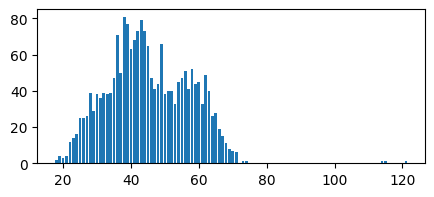

In [95]:
# Cleaning age feature

ages = imputed_df['age'].value_counts().keys()
v = imputed_df['age'].value_counts()

h_age = imputed_df[imputed_df['age'] > 99]['age'].tolist()
min_age = imputed_df["age"].min()

print(f'Ages above 99:\n{h_age}\n\nMinimu age in data:\n{min_age}')

fig = plt.figure(figsize = (5, 2))
plt.bar(ages, v)
plt.grid(False)


In [96]:
# Dropping unrealistic ages from data 

age_to_drop = imputed_df[imputed_df['age'] > 99].index
imputed_df.drop(age_to_drop, axis=0, inplace=True)

<div style="background-color: LightBlue; border-radius: 10px; padding: 10px;">
    <h2 style="color: Black; margin: 0;"><center>Feature Correltation</center></h2>
</div>


---

## Interesting Correlations Observed

- **Strong Positive Correlations:**
  - `total_spend` with `meat`, `wine`, and `catalog_purchase`
  
  $\;$

- **Negative Correlations:**
  - `total_spend` with `web_visit` and `kidhome`
  
  $\;$

- **Weak or No Strong Correlations:**
  - `year_Birth`, `activity_rate`, `complain`, and `total_time`
  

I will drop the attributes with weak correlations to reduce dimensionality.

---

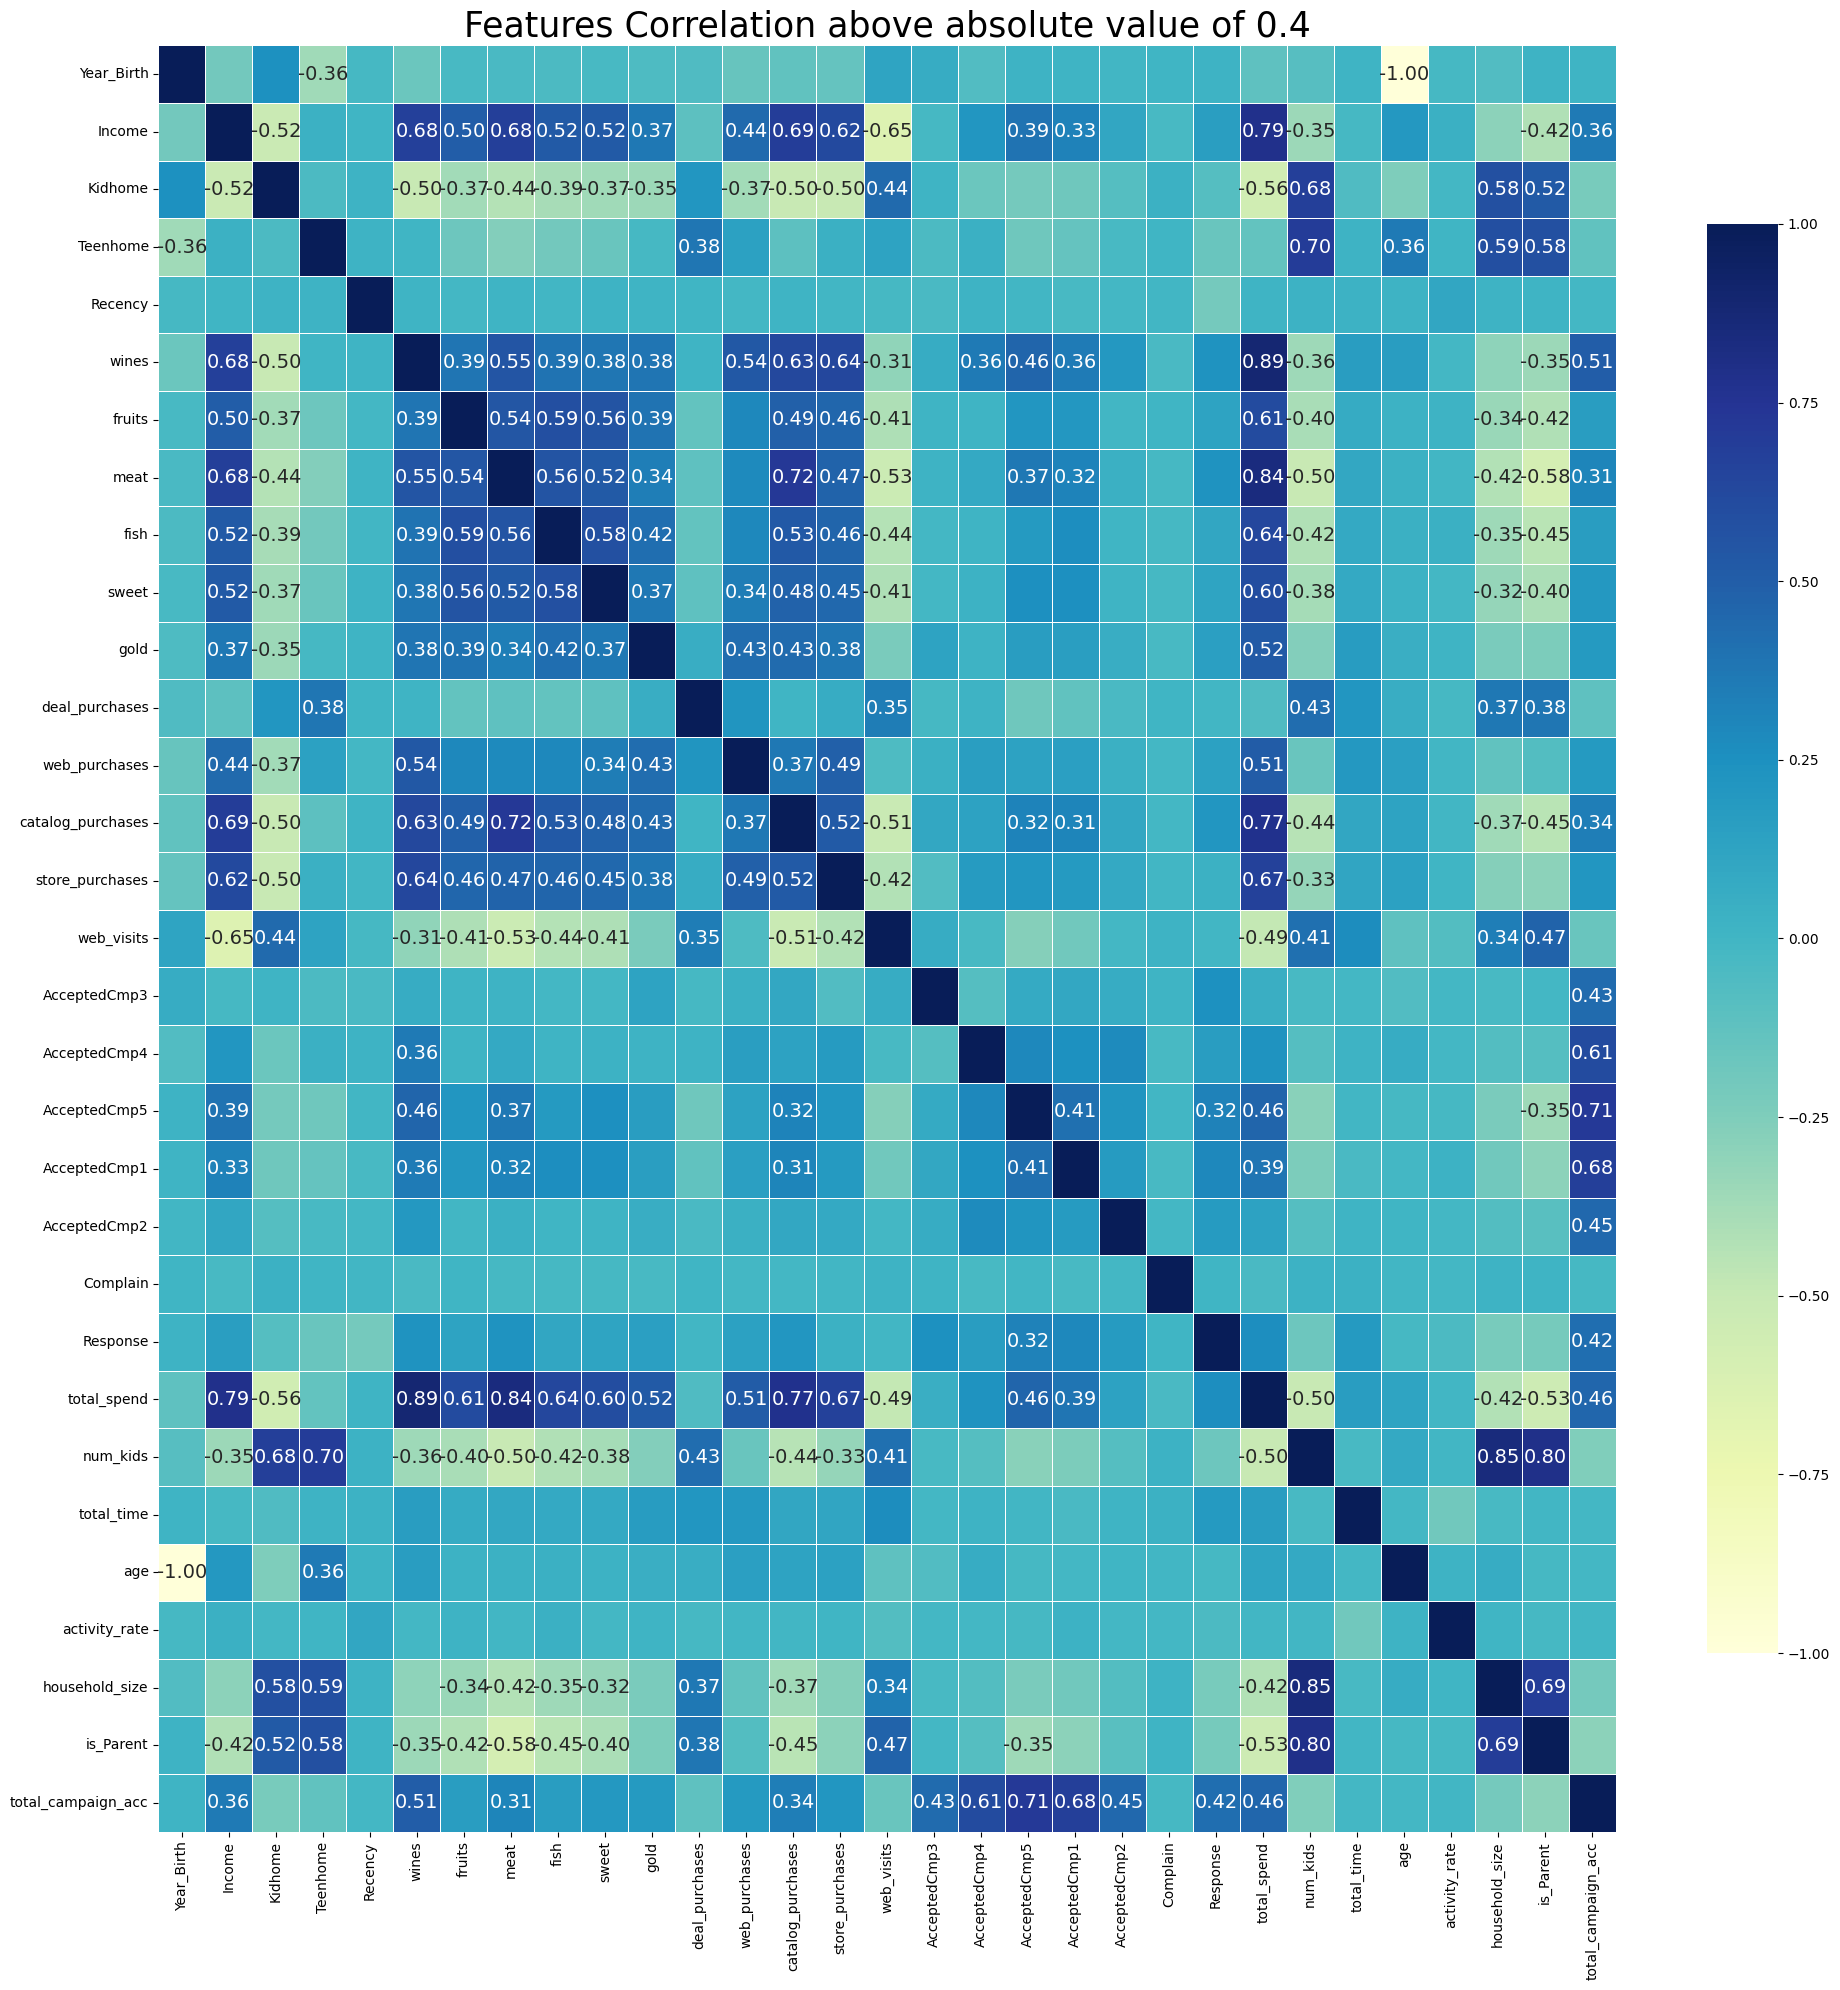

In [97]:
#correlation matrix

def annot_format(val):
    if abs(val) >= 0.3 and abs(val) != 1:
        return f'{val:.2f}'
    else:
        return ''
    
    
corr_ = imputed_df.drop('ID', axis=1).corr()

plt.figure(figsize=(20, 20))

sns.heatmap(corr_, fmt='', cmap='YlGnBu', center=0, linewidths=0.5, annot_kws={"size": 14}, 
            cbar_kws={'shrink': .8},
            annot= np.vectorize(annot_format)(corr_.values))
plt.title('Features Correlation above absolute value of 0.4', size=25)
plt.tight_layout()
plt.show()

<div style="background-color: LightBlue; border-radius: 10px; padding: 10px;">
    <h2 style="color: Black; margin: 0;"><center>Data Preparation</center></h2>
</div>

In [98]:
## From here on I will be creating a copy of the data and prepare the data for clustering 

In [99]:
data = imputed_df.copy()


---

## Ordinal Encoding

To prepare our data for analysis, I will perform Ordinal Encoding on the categorical variables 'Marital Status' and 'Education'. This encoding method will convert these ordinal categorical values into numerical values

---



In [100]:
education_order = ['Undergraduate', 'Postgraduate']
status_order = ['Single', 'Together']

oe = OrdinalEncoder(categories=[education_order, status_order])

data[['Education', 'Marital_Status']] = oe.fit_transform(data[['Education', 'Marital_Status']])

print('Label Encoding of Martial_Status', '\n\n', data[['Marital_Status']].value_counts())
print('\n','Ordinal Encoding of Eduction','\n\n',data[["Education"]].value_counts())

Label Encoding of Martial_Status 

 Marital_Status
1.0               1314
0.0                740
dtype: int64

 Ordinal Encoding of Eduction 

 Education
1.0          1819
0.0           235
dtype: int64


---

### Separating Binary Columns

I separate binary columns to maintain their integrity during scaling and preprocessing.

### Scaling

I apply standard scaling to normalize continuous features

### PCA 

I use PCA to reduce dimensionality

---


In [101]:
# Seprating Binary columns and removing low corr columns 

binary_col = data[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'is_Parent', 'Response']]

to_scale_df = data.drop(['ID', 'Year_Birth', 'Complain', 'activity_rate', 'total_time', 'Dt_Customer'], axis=1)

to_scale_df = to_scale_df.drop(binary_col, axis=1)


In [102]:
# StdScaler 

scaler = StandardScaler()

scaled_df = scaler.fit_transform(to_scale_df)

scaled_df = pd.DataFrame(scaled_df, columns=to_scale_df.columns)

In [103]:
pca = PCA(n_components=2)  
pca.fit(scaled_df)

pca_df = pd.DataFrame(data=pca.transform(scaled_df), columns=['PC1', 'PC2'])
print("Reducing dims using PCA","\n\n","Before:",scaled_df.shape, "After:", pca_df.shape)

Reducing dims using PCA 

 Before: (2054, 22) After: (2054, 2)


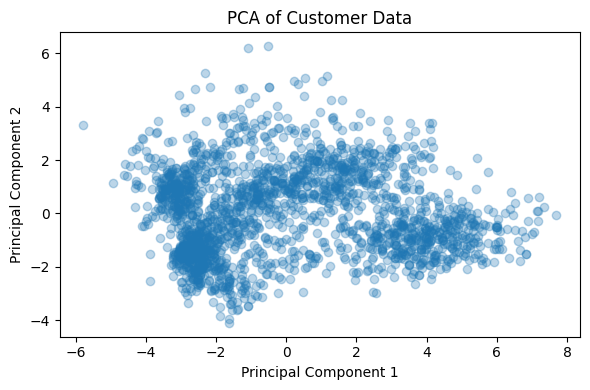

In [104]:
plt.figure(figsize=(6, 4))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Data')
plt.grid(False)
plt.tight_layout()
plt.show()



---

## Elbow Method for KMeans Clustering

I use the Elbow Method to determine the optimal number of clusters by plotting the sum of squared distances and identifying the point where the rate of decrease sharply slows.

---



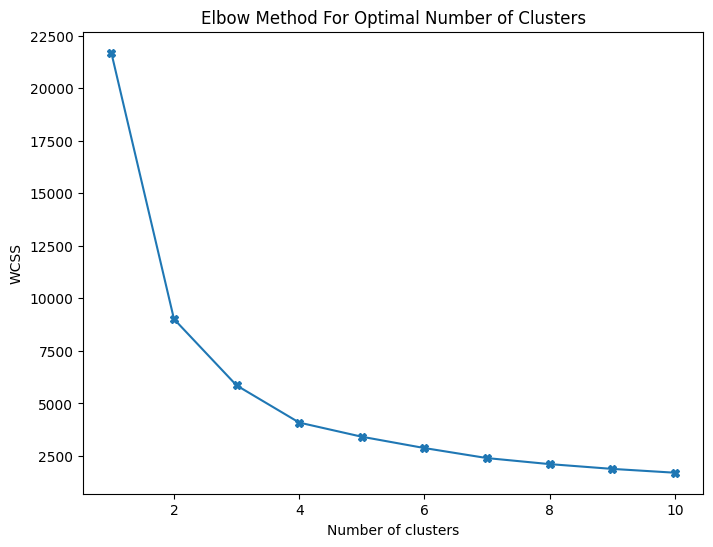

In [105]:
wcss = [] # Within cluster sum of squares 

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='X')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


In [106]:
# Applying KMeans clustering with k=4
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(pca_df)

pca_df['cluster'] = clusters

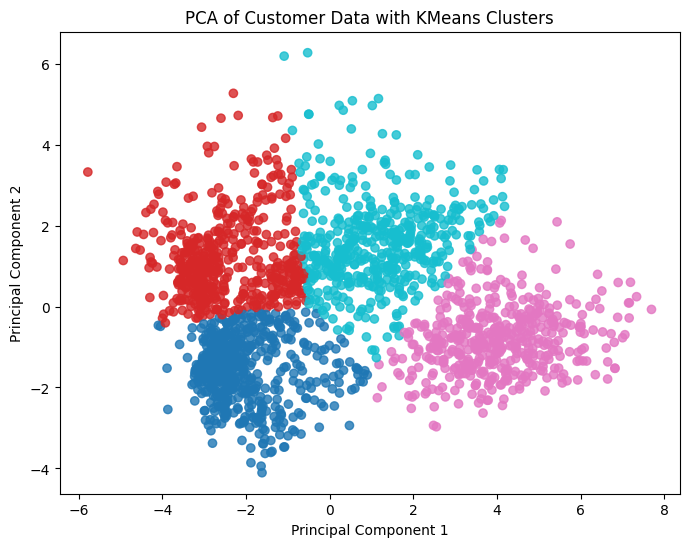

In [107]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['cluster'], cmap='tab10', alpha=0.8)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Customer Data with KMeans Clusters')
cb = plt.colorbar()
cb.remove()
plt.grid(False)
plt.show()

In [108]:
imputed_df['cluster'] = clusters

imputed_df['cluster'].replace({0:1,
                               1:2,
                               2:3,
                               3:4}, inplace=True)

cluster_profiles = imputed_df.groupby('cluster').mean()
cluster_profiles.T

cluster,1,2,3,4
ID,5613.029703,5513.938650,5726.338205,5533.812500
Year_Birth,1975.676568,1964.985685,1968.356994,1964.820833
Income,32242.221122,42790.501022,76185.615866,62362.016667
Kidhome,0.696370,0.842536,0.012526,0.156250
Teenhome,0.123762,0.993865,0.066806,0.945833
Recency,48.209571,49.325153,48.832985,49.658333
wines,35.976898,109.310838,615.419624,530.506250
fruits,6.579208,4.415133,66.630480,32.843750
meat,25.536304,37.024540,469.062630,179.754167
fish,9.810231,6.728016,97.323591,43.427083


In [109]:

def _scale_data(data, ranges):
    (x1, x2) = ranges[0]
    scaled_data = []
    for d, (y1, y2) in zip(data, ranges):
        scaled_value = (d - y1) / (y2 - y1) * (x2 - x1) + x1
        scaled_data.append(scaled_value)
    return scaled_data

class RadarChart():
    def __init__(self, fig, location, sizes, variables, ranges, n_ordinate_levels=6, label_offset=1.2, fontsize=12):
        angles = np.arange(0, 360, 360./len(variables))
        ix, iy = location[:]
        size_x, size_y = sizes[:]
        
        axes = [fig.add_axes([ix, iy, size_x, size_y], polar=True, label=f"axes{i}") for i in range(len(variables))]
        _, text = axes[0].set_thetagrids(angles, labels=variables)
        
        for txt, angle in zip(text, angles):
            radius = txt.get_position()[0]
            txt.set_position((radius * label_offset, txt.get_position()[1]))
            txt.set_fontsize(fontsize)
            if angle > -1 and angle < 181:
                txt.set_rotation(angle - 90)
            else:
                txt.set_rotation(angle - 270)
        
        for ax in axes[1:]:
            ax.patch.set_visible(False)
            ax.xaxis.set_visible(False)
            ax.grid("off")
        
        for i, ax in enumerate(axes):
            grid = np.linspace(*ranges[i], num=n_ordinate_levels)
            grid_label = [""] + [f"{x:.0f}" for x in grid[1:]]
            ax.set_rgrids(grid, labels=grid_label, angle=angles[i], fontsize=fontsize)
            ax.set_ylim(*ranges[i])
            
        
        self.angle = np.deg2rad(np.r_[angles, angles[0]])
        self.ranges = ranges
        self.ax = axes[0]
                
    def plot(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.plot(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def fill(self, data, *args, **kw):
        sdata = _scale_data(data, self.ranges)
        self.ax.fill(self.angle, np.r_[sdata, sdata[0]], *args, **kw)

    def legend(self, *args, **kw):
        self.ax.legend(*args, **kw)
        
    def title(self, title, *args, **kw):
        self.ax.text(0.5, 0.5, title, transform=self.ax.transAxes, ha="center", fontsize=14, *args, **kw)

<div style="background-color: LightBlue; border-radius: 10px; padding: 10px;">
    <h2 style="color: Black; margin: 0;"><center>Clusters Analysis</center></h2>
</div>

### <center>Customer Behaviour by Cluster</center>

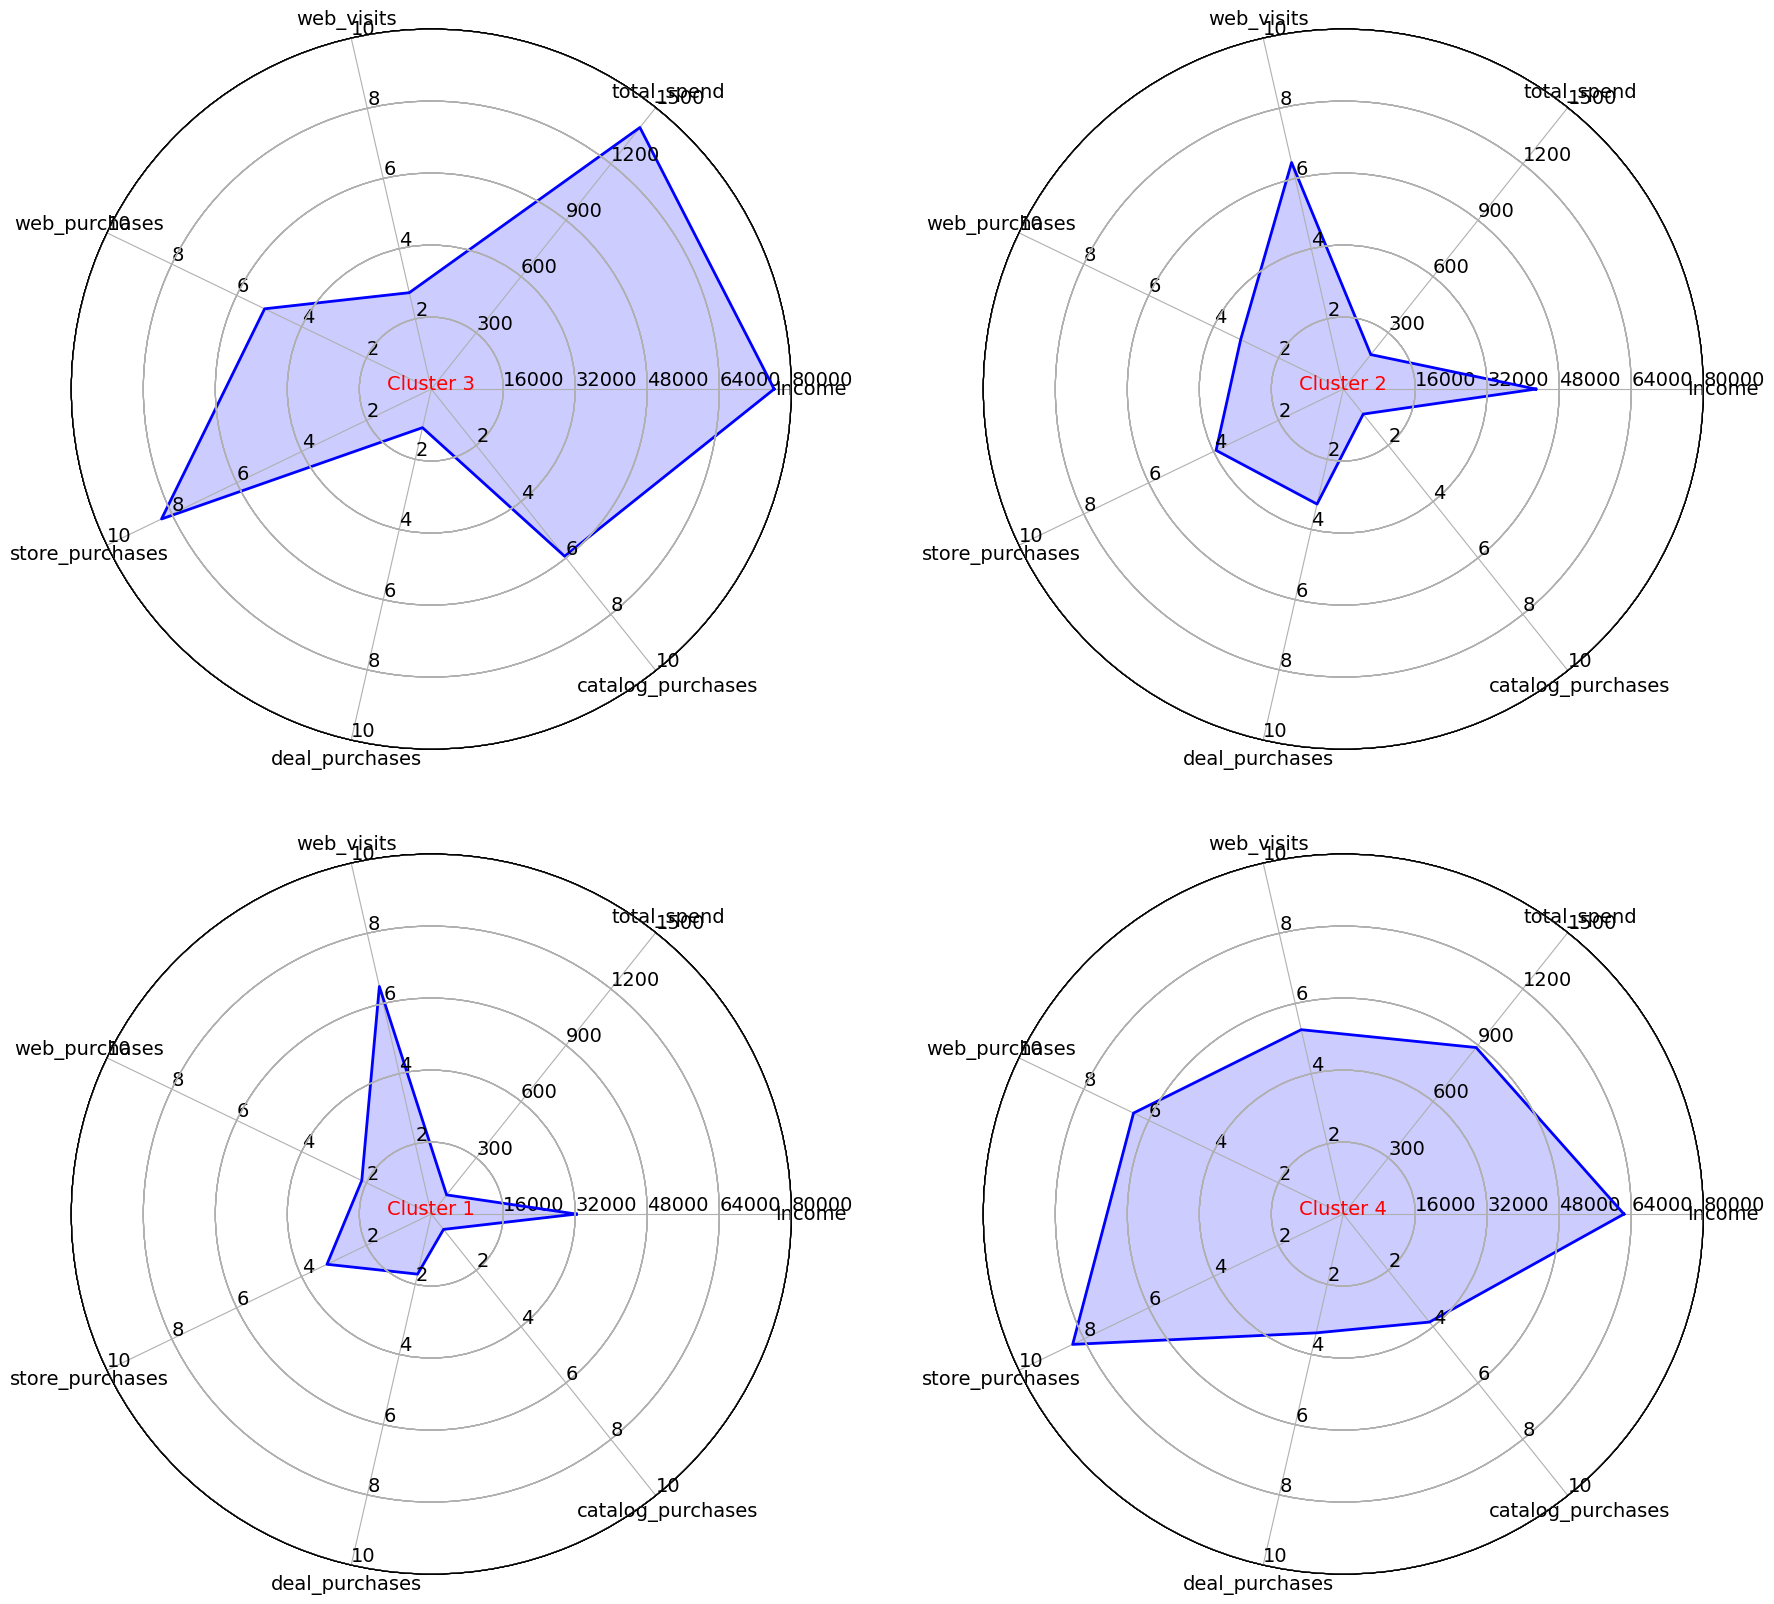

In [110]:

fig = plt.figure(figsize=(19, 15))

attributes = ['Income', 'total_spend', 'web_visits','web_purchases', 'store_purchases',  'deal_purchases', 'catalog_purchases']
ranges = [[0.01, 80000], [0.01, 1500], [0.01, 10], [0.01, 10], [0.01, 10], [0.01, 10], [0.01, 10]]
clusters = imputed_df['cluster'].unique()

n_clusters = len(clusters)
i_cols = 2
i_rows = n_clusters // i_cols + (n_clusters % i_cols > 0)
size_x, size_y = (1 / i_cols) - 0.02, (1 / i_rows) - 0.02

for ind in range(n_clusters):
    ix = ind % i_cols
    iy = i_rows - ind // i_cols - 1
    pos_x = ix * size_x + ix * 0.0  # Adjust spacing horizontally
    pos_y = iy * size_y + iy * 0.07  # Adjust spacing vertically
    location = [pos_x, pos_y]
    sizes = [size_x, size_y]
 
    data = imputed_df[imputed_df['cluster'] == clusters[ind]][attributes].mean().values
    radar = RadarChart(fig, location, sizes, attributes, ranges, fontsize=14)
    radar.plot(data, color='b', linewidth=2.0)
    radar.fill(data, alpha=0.2, color='b')
    radar.title(title=f'Cluster {clusters[ind]}', color='r')

fig.tight_layout()


### <center>Product Intrest by cluster</center> 

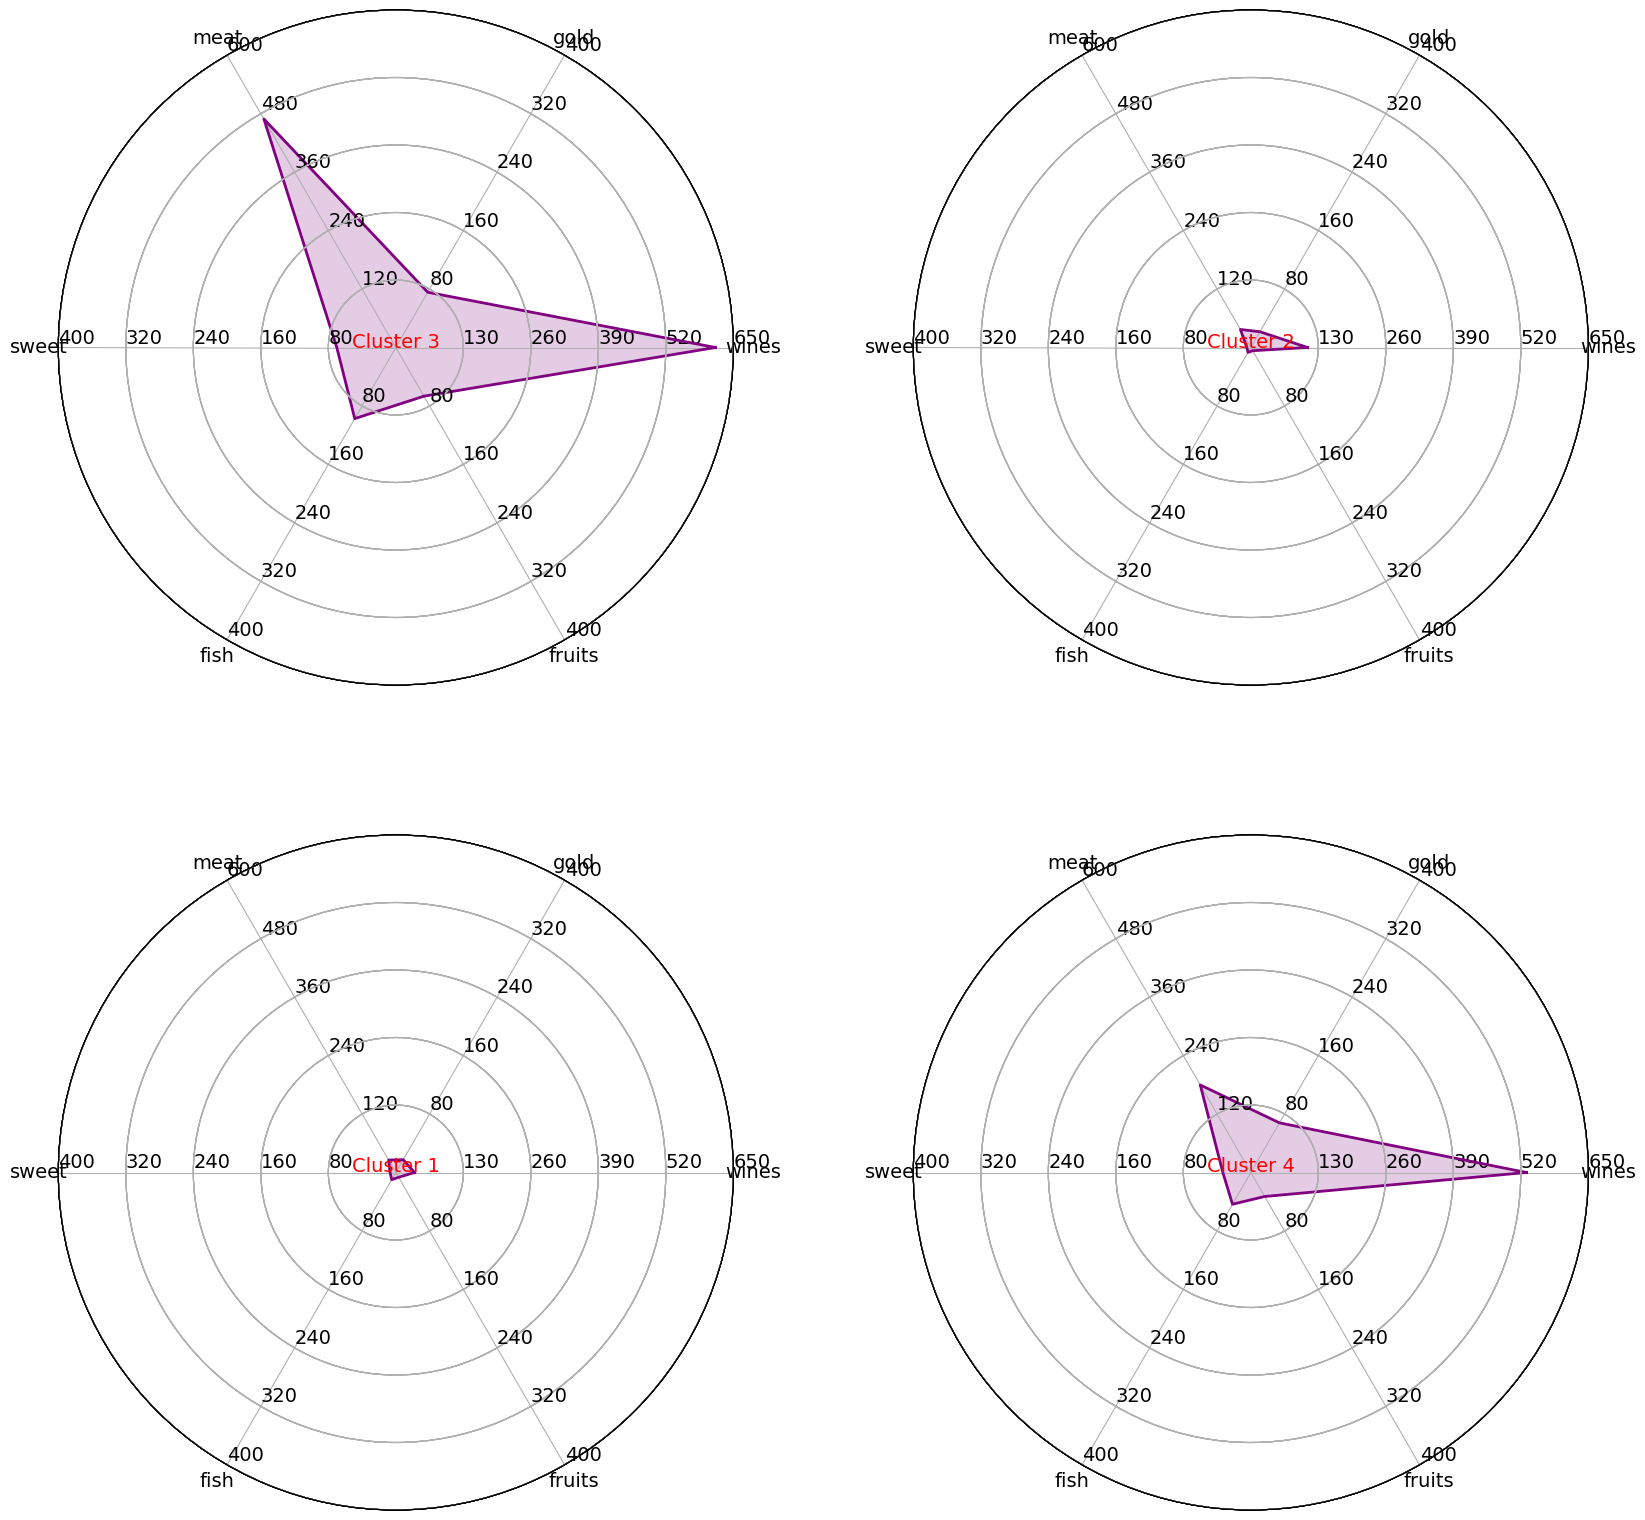

In [111]:



fig = plt.figure(figsize=(19, 15))

attributes = ['wines', 'gold', 'meat', 'sweet', 'fish', 'fruits']
ranges = [[0.01, 650], [0.01, 400], [0.01, 600], [0.01, 400], [0.01, 400], [0.01, 400]]
clusters = imputed_df['cluster'].unique()

n_clusters = len(clusters)
i_cols = 2
i_rows = n_clusters // i_cols + (n_clusters % i_cols > 0)
size_x, size_y = (1 / i_cols) - 0.05, (1 / i_rows) - 0.05

for ind in range(n_clusters):
    ix = ind % i_cols
    iy = i_rows - ind // i_cols - 1
    pos_x = ix * size_x + ix * 0.0  # Adjust spacing horizontally
    pos_y = iy * size_y + iy * 0.1  # Adjust spacing vertically
    location = [pos_x, pos_y]
    sizes = [size_x, size_y]
 
    data = imputed_df[imputed_df['cluster'] == clusters[ind]][attributes].mean().values
    radar = RadarChart(fig, location, sizes, attributes, ranges, fontsize=14)
    radar.plot(data, color='purple', linewidth=2.0)
    radar.fill(data, alpha=0.2, color='purple')
    radar.title(title=f'Cluster {clusters[ind]}', color='r')

fig.tight_layout()


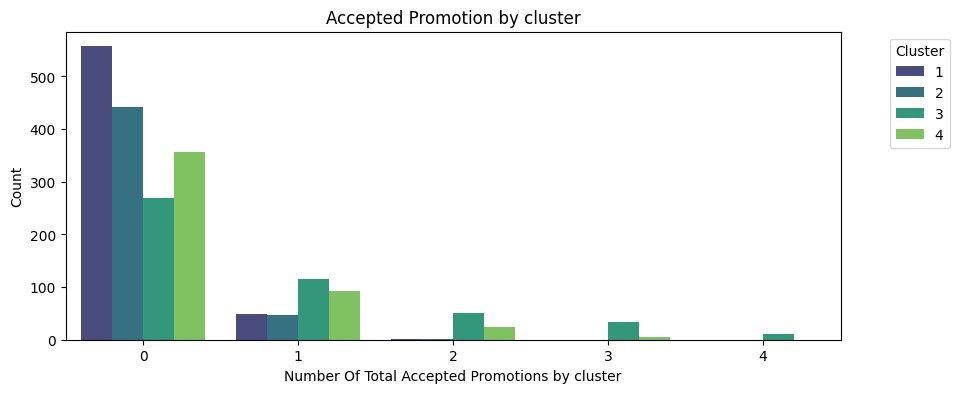

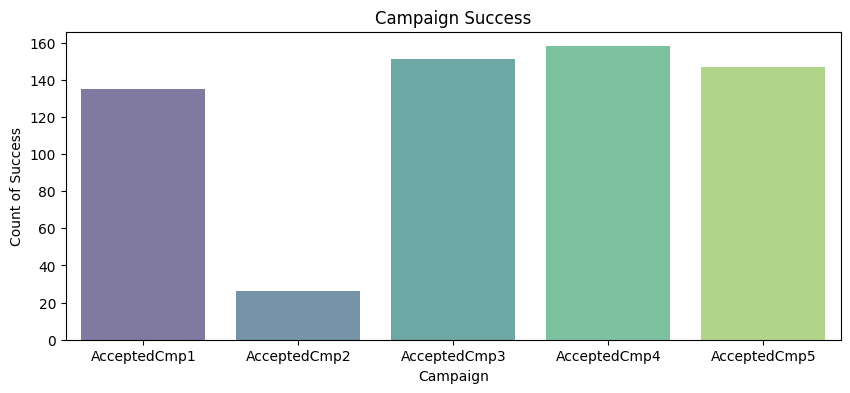

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sum up the values in each campaign column
campaign_sum = imputed_df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

# Plotting count of total campaign accepted
plt.figure(figsize=(10, 4))

ax1 = sns.countplot(x=imputed_df["total_campaign_acc"], hue=imputed_df["cluster"], palette="viridis")
ax1.set_title("Accepted Promotion by cluster")
ax1.set_xlabel("Number Of Total Accepted Promotions by cluster")
ax1.set_ylabel("Count")
ax1.grid(False)
ax1.legend(title='Cluster', bbox_to_anchor=(1.15, 1))
plt.show()

# Plotting the success of each campaign
plt.figure(figsize=(10, 4))

ax2 = sns.barplot(x=campaign_sum.index, y=campaign_sum.values, palette="viridis", alpha=0.7)
ax2.set_title("Campaign Success")
ax2.set_xlabel("Campaign")
ax2.set_ylabel("Count of Success")
ax2.grid(False)
plt.show()


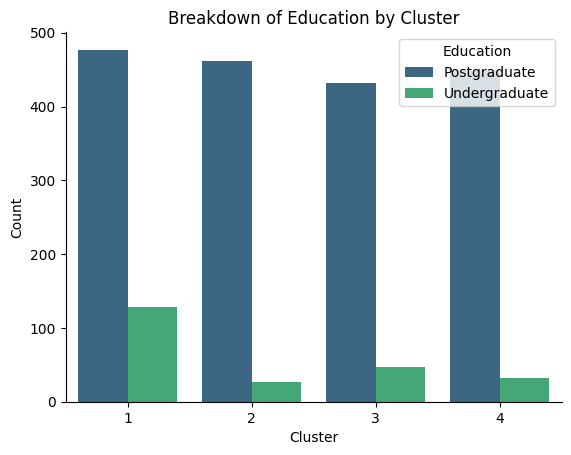

In [114]:
sns.countplot(x='cluster', hue='Education', data=imputed_df, palette='viridis')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Breakdown of Education by Cluster')
sns.despine()
plt.show()


<Figure size 200x200 with 0 Axes>

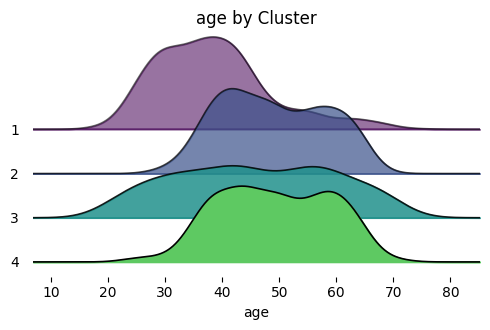

<Figure size 200x200 with 0 Axes>

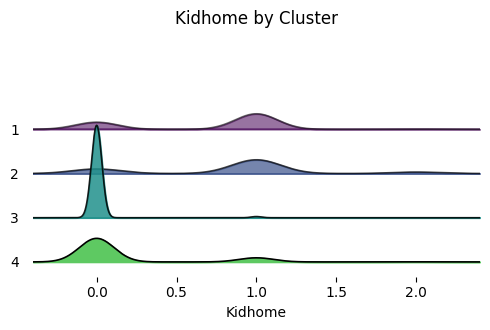

<Figure size 200x200 with 0 Axes>

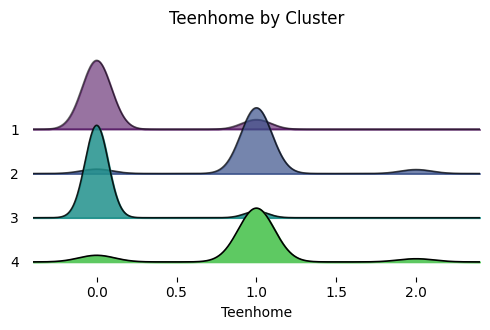

<Figure size 200x200 with 0 Axes>

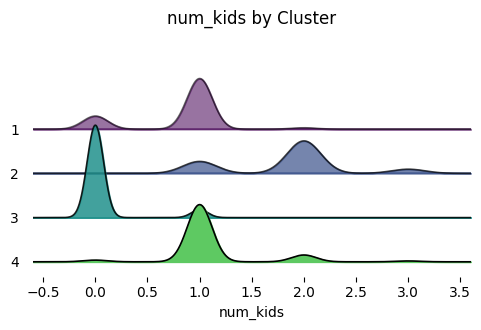

<Figure size 200x200 with 0 Axes>

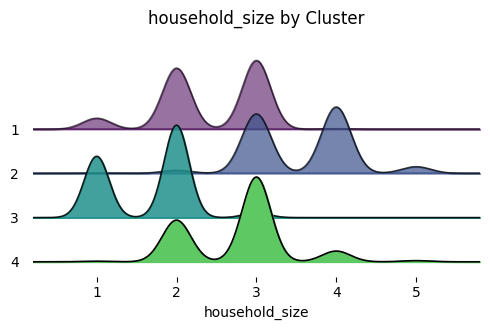

<Figure size 200x200 with 0 Axes>

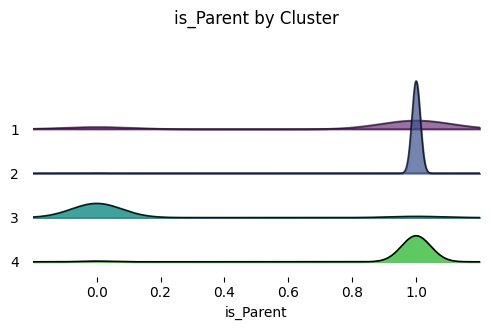

In [115]:
import matplotlib.pyplot as plt
from joypy import joyplot
import pandas as pd

# Define the attributes
attributes = ["age", "Kidhome", "Teenhome", "num_kids", "household_size", "is_Parent"]

# Plotting ridgeline plots
for attribute in attributes:
    plt.figure(figsize=(2, 2))
    
    # Create a temporary DataFrame for joyplot
    tmp_df = imputed_df[[attribute, 'cluster']]
    tmp_df = tmp_df.rename(columns={'cluster': 'Cluster'})
    
    # Plot the ridgeline plot
    joyplot(
        figsize=(5, 3),
        data=tmp_df, 
        by='Cluster', 
        column=attribute, 
        colormap=plt.cm.viridis,
        grid=False,
        linewidth=1.2,
        fade=True
    )
    
    plt.title(f'{attribute} by Cluster')
    plt.xlabel(attribute)
    plt.show()



<div style="background-color: #fde725; padding: 20px; border-radius: 5px; font-family: Arial, sans-serif; line-height: 1.6; margin-bottom: 20px;">
  <h2 style="color: #482677; text-align: center;">Insights & Action Plans for Each Cluster</h2>
</div>

<div style="background-color: #73D055; padding: 20px; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); margin-bottom: 20px;">
  <h3 style="color: #482677;">Cluster 1:</h3>
  <p><strong>Description:</strong></p>
  <ul>
    <li>High website visits, low web purchases</li>
    <li>Low income and low spend</li>
    <li>No specific product preference</li>
    <li>Majority are young parents with one child</li>
    <li>Highest level of undergraduate education</li>
    <li>No interest in marketing campaigns</li>
  </ul>
  <p><strong>Action Plan:</strong></p>
  <ul>
    <li><strong>Increase Web Purchase Conversion:</strong>
      <ul>
        <li>Simplify the online purchase process.</li>
        <li>Offer incentives for online purchases (e.g., free shipping, discounts on first purchase).</li>
      </ul>
    </li>
    <li><strong>Targeted Marketing:</strong>
      <ul>
        <li>Use personalized recommendations to highlight products that might interest young parents.</li>
        <li>Introduce loyalty programs to encourage repeat purchases.</li>
      </ul>
    </li>
    <li><strong>Educational Content:</strong>
      <ul>
        <li>Provide content on budgeting and maximizing value, which could appeal to low-income families.</li>
      </ul>
    </li>
    <li><strong>Partnerships:</strong>
      <ul>
        <li>Partner with educational institutions to offer discounts or promotions to students and young graduates.</li>
      </ul>
    </li>
  </ul>
</div>

<div style="background-color: #95D840; padding: 20px; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); margin-bottom: 20px;">
  <h3 style="color: #482677;">Cluster 2:</h3>
  <p><strong>Description:</strong></p>
  <ul>
    <li>Medium income, low spend</li>
    <li>Attracted to deals, medium purchase pattern except for catalog</li>
    <li>High web visits, medium web purchases</li>
    <li>Spend mostly on meat, gold, and wine</li>
    <li>Parents, mostly with teens, household size varies</li>
    <li>Lowest amount of undergraduate education</li>
    <li>Little interest in marketing campaigns</li>
  </ul>
  <p><strong>Action Plan:</strong></p>
  <ul>
    <li><strong>Promotional Campaigns:</strong>
      <ul>
        <li>Highlight deals and discounts prominently in marketing materials.</li>
        <li>Use limited-time offers to create urgency.</li>
      </ul>
    </li>
    <li><strong>Cross-Selling:</strong>
      <ul>
        <li>Promote complementary products to increase average order value (e.g., pair wines with gourmet foods).</li>
      </ul>
    </li>
    <li><strong>Enhanced Online Experience:</strong>
      <ul>
        <li>Improve the website’s user experience to convert high web visits into purchases.</li>
        <li>Use retargeting ads to remind visitors of items they viewed.</li>
      </ul>
    </li>
    <li><strong>Community Engagement:</strong>
      <ul>
        <li>Create family-oriented events or promotions that appeal to parents with teens.</li>
        <li>Offer bundles that cater to family needs.</li>
      </ul>
    </li>
  </ul>
</div>

<div style="background-color: #B8DE29; padding: 20px; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); margin-bottom: 20px;">
  <h3 style="color: #482677;">Cluster 3:</h3>
  <p><strong>Description:</strong></p>
  <ul>
    <li>Highest income and spend</li>
    <li>High purchases via all routes</li>
    <li>No interest in deals</li>
    <li>Low web visits but high web purchases</li>
    <li>Very high spend on meat and wine</li>
    <li>Spread across all age groups, normal distribution</li>
    <li>No kids or teens at home, slightly more than half partnered</li>
    <li>Higher undergraduate education</li>
    <li>Highest interest in marketing campaigns</li>
  </ul>
  <p><strong>Action Plan:</strong></p>
  <ul>
    <li><strong>Premium Products:</strong>
      <ul>
        <li>Promote high-end, luxury items that cater to their high spending capacity.</li>
        <li>Offer exclusive products and services (e.g., premium wine subscriptions).</li>
      </ul>
    </li>
    <li><strong>Personalized Marketing:</strong>
      <ul>
        <li>Use data-driven insights to provide personalized offers and product recommendations.</li>
        <li>Leverage email marketing with tailored content.</li>
      </ul>
    </li>
    <li><strong>Loyalty Programs:</strong>
      <ul>
        <li>Implement a tiered loyalty program with exclusive rewards and benefits for high spenders.</li>
      </ul>
    </li>
    <li><strong>Convenience Services:</strong>
      <ul>
        <li>Offer concierge services, such as personal shopping assistants and expedited delivery options.</li>
      </ul>
    </li>
  </ul>
</div>

<div style="background-color: #DCE319; padding: 20px; border-radius: 5px; box-shadow: 0 0 10px rgba(0, 0, 0, 0.1); margin-bottom: 20px;">
  <h3 style="color: #482677;">Cluster 4:</h3>
  <p><strong>Description:</strong></p>
  <ul>
    <li>High income and spend</li>
    <li>Active on web visits, buying via all routes</li>
    <li>Interest in deals</li>
    <li>Medium-high spend on meat, high spend on wine</li>
    <li>Parents with household size between 2 to 4, mostly with teens</li>
    <li>Low undergraduate education</li>
    <li>High interest in marketing campaigns</li>
  </ul>
  <p><strong>Action Plan:</strong></p>
  <ul>
    <li><strong>Deal-Based Promotions:</strong>
      <ul>
        <li>Highlight discounts and value bundles, especially on popular items like meat and wine.</li>
        <li>Use flash sales and loyalty discounts to attract interest.</li>
      </ul>
    </li>
    <li><strong>Family-Oriented Marketing:</strong>
      <ul>
        <li>Create marketing campaigns focused on family needs and values.</li>
        <li>Offer family bundles and multi-buy discounts.</li>
      </ul>
    </li>
    <li><strong>Engagement Campaigns:</strong>
      <ul>
        <li>Use interactive campaigns such as contests or challenges that engage both parents and teens.</li>
        <li>Promote events and activities that appeal to the whole family.</li>
      </ul>
    </li>
    <li><strong>Educational Content:</strong>
      <ul>
        <li>Provide content that helps families save money and make the most of their purchases.</li>
        <li>Offer tips and recipes that utilize the products they frequently buy.</li>
      </ul>
    </li>
  </ul>
</div>






## <center>Conclusion</center>
---

In this project, I used the KMeans model to cluster different types of customers in the data. The analysis provided insights into various clusters and suggested action plans for each cluster based on purchase patterns, behaviors, and descriptions.

### Insights and Action Plans
- Detailed insights into different customer clusters
- Suggested action plans tailored to each cluster's characteristics

### Future Enhancements
- Possible addition: Use KNN for new data points to classify them into existing clusters

---

